<a href="https://colab.research.google.com/github/S-HILPA-S/CASE-STUDIES/blob/main/CUSTOMER_CHURN_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **CUSTOMER CHURN PREDICTION**

Objective: To develop a machine learning model to predict customer churn
 for a telecommunications company. The company wants to identify which customers are likely to
 leave (churn) and target them with retention offers. The goal is to create a machine learning
 model that accurately predicts customer churn based on historical customer data.

# **Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, precision_score, recall_score

# **Loading dataset from google drive**

In [2]:
# loading dataset from google drive
# mount the google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
train_path = "/content/drive/MyDrive/DSA ICT/DATA/CUSTOMER CHURN PREDICTION/Training_data.csv"
test_path = "/content/drive/MyDrive/DSA ICT/DATA/CUSTOMER CHURN PREDICTION/Testing_data.csv"

df_train = pd.read_csv(train_path)
df_test =pd.read_csv(test_path)

# **EXPLORATORY DATA ANALYSIS**

Not all EDA needs to be done in TEST DATA .

 To understand the distribution of each
 feature and its relationship with the target variable, Churn,only train data is used.

 To identify missing values, outliers, and other data quality issues ,both datasets are used.


In [4]:
df_train.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,9509-MPYOD,Female,0,No,No,35,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.75,700.45,No
1,7746-AWNQW,Female,0,No,No,28,No,No phone service,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,35.75,961.4,No
2,2208-UGTGR,Male,0,No,No,56,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,98.60,5581.05,No
3,4884-LEVMQ,Male,0,Yes,No,39,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.45,790,No
4,6682-VCIXC,Female,0,Yes,Yes,43,No,No phone service,DSL,NaN,...,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),51.25,2151.6,No


In [5]:
df_test.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,6080-TCMYC,Male,0,Yes,Yes,40,Yes,Yes,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,81.20,3292.3,No
1,7285-KLOTR,Female,0,Yes,No,12,Yes,Yes,DSL,Yes,...,Yes,No,Yes,Yes,One year,No,Electronic check,78.85,876.75,No
2,7486-KSRVI,Male,0,No,No,43,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,One year,Yes,Electronic check,100.00,4211.55,Yes
3,9924-JPRMC,Male,0,No,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.20,8547.15,No
4,4439-YRNVD,Female,0,No,No,10,No,No phone service,DSL,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,36.25,374,No


In [6]:
# defining functions to understanding the data

def perform_eda(df):
    print("\nInfo ")
    print("\n",df.info())


    print("\n \n \n Missing Values")
    print("\n",df.isnull().mean()*100)


    print("\n \n \n Unique Values")
    print("\n ",df.nunique())

    print("\n \n \n Checking Duplicates")
    print("\n RoW Duplicates",df.duplicated().sum())
    print("\n Column Duplicates",df.T.duplicated().sum())

    print("\n \nDescriptive Statistics")
    print("\n",df.describe())


    if 'Churn' in df.columns:
        print("\n \n Target Variable Distribution")
        print(df['Churn'].value_counts())

In [7]:
perform_eda(df_train)


Info 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5465 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5465 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   o

Inference:


1) info :

The type of the column "MonthlyCharges" is of type object but is actually float.

2) missing values :

 The columns gender(categorical),online security(categorical) ,MonthlyCharges(numerical),TotalCharges(numerical)  has small percentage of missing values which needs to be treated.

 3)There is no duplicates in both columns and rows.

In [8]:
perform_eda(df_test)


Info 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1409 non-null   object 
 1   gender            1409 non-null   object 
 2   SeniorCitizen     1409 non-null   int64  
 3   Partner           1409 non-null   object 
 4   Dependents        1409 non-null   object 
 5   tenure            1409 non-null   int64  
 6   PhoneService      1409 non-null   object 
 7   MultipleLines     1409 non-null   object 
 8   InternetService   1409 non-null   object 
 9   OnlineSecurity    1409 non-null   object 
 10  OnlineBackup      1409 non-null   object 
 11  DeviceProtection  1409 non-null   object 
 12  TechSupport       1409 non-null   object 
 13  StreamingTV       1409 non-null   object 
 14  StreamingMovies   1409 non-null   object 
 15  Contract          1409 non-null   object 
 16  PaperlessBilling  1409 non-null   o



In this set we  have to change the type of column Totalcharges to float as it is denoted by object in the data .Also the column SeniorCitizen to category.

In [9]:
# removing unwanted columns

df_train = df_train.drop("customerID",axis=1)
df_test = df_test.drop("customerID",axis=1)

In [10]:
# changing type column TotalCharges and SeniorCitizen to category
df_train['TotalCharges'] = pd.to_numeric(df_train['TotalCharges'], errors='coerce')
df_test['TotalCharges'] = pd.to_numeric(df_test['TotalCharges'], errors='coerce')

df_train["SeniorCitizen"] = df_train["SeniorCitizen"].astype("category")
df_test["SeniorCitizen"] = df_test["SeniorCitizen"].astype("category")

In [11]:
def handle_missing(df, skew_threshold=1):
    for col in df.columns:
        if df[col].dtype == 'object' or "category":  # categorical
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:  # numerical
            skewness = df[col].skew(skipna=True)
            if abs(skewness) < skew_threshold:
                df[col].fillna(df[col].mean(), inplace=True)
            else:
                df[col].fillna(df[col].median(), inplace=True)
    return df

df_train = handle_missing(df_train)
df_test = handle_missing(df_test)

/tmp/ipython-input-956311954.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/tmp/ipython-input-956311954.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [12]:
perform_eda(df_train) # checking whether we get the desired results


Info 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            5634 non-null   object  
 1   SeniorCitizen     5634 non-null   category
 2   Partner           5634 non-null   object  
 3   Dependents        5634 non-null   object  
 4   tenure            5634 non-null   int64   
 5   PhoneService      5634 non-null   object  
 6   MultipleLines     5634 non-null   object  
 7   InternetService   5634 non-null   object  
 8   OnlineSecurity    5634 non-null   object  
 9   OnlineBackup      5634 non-null   object  
 10  DeviceProtection  5634 non-null   object  
 11  TechSupport       5634 non-null   object  
 12  StreamingTV       5634 non-null   object  
 13  StreamingMovies   5634 non-null   object  
 14  Contract          5634 non-null   object  
 15  PaperlessBilling  5634 non-null   object  
 16  PaymentMethod    

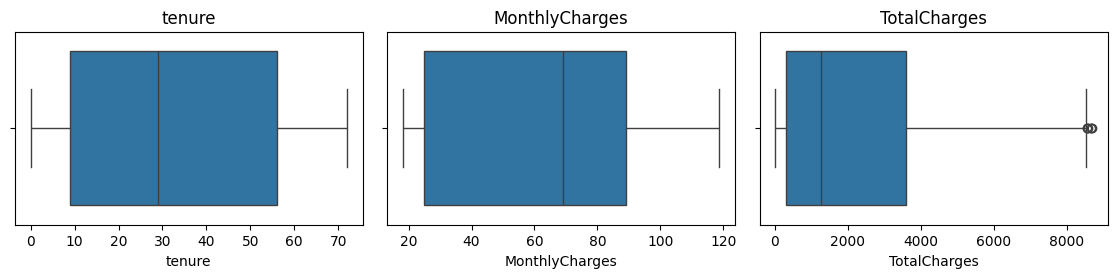

In [13]:

# outliers detection in train dataset
numerical_cols = df_train.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(x=df_train[col])
    plt.title(col)

plt.tight_layout()
plt.show()

The column Total charges contain outliers.

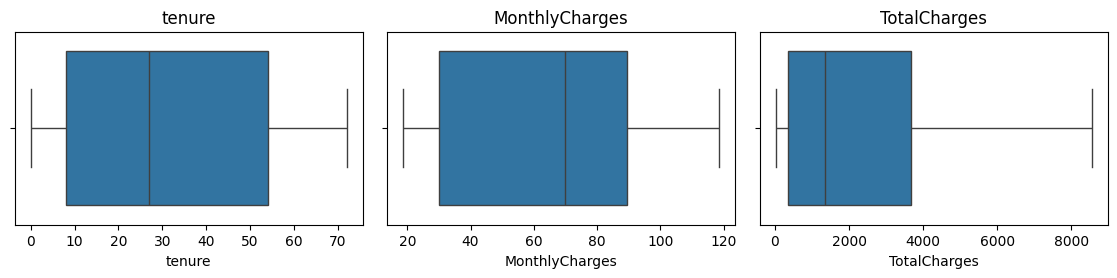

In [14]:

# outliers detection in test dataset
numerical_cols = df_test.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(x=df_test[col])
    plt.title(col)

plt.tight_layout()
plt.show()

No outliers is present.

In [15]:
# handling outliers in train data:
Q1 = df_train['TotalCharges'].quantile(0.25)
Q3 = df_train['TotalCharges'].quantile(0.75)

IQR = Q3 - Q1
low_limit = Q1 - 1.5 * IQR
up_limit = Q3 + 1.5 * IQR


In [16]:
outliers = []
for i in df_train['TotalCharges']:
  if i < low_limit or i > up_limit:
    outliers.append(i)

print(outliers)

[8670.1, 8684.8, 8594.4, 8543.25, 8672.45, 8564.75]


<Axes: ylabel='TotalCharges'>

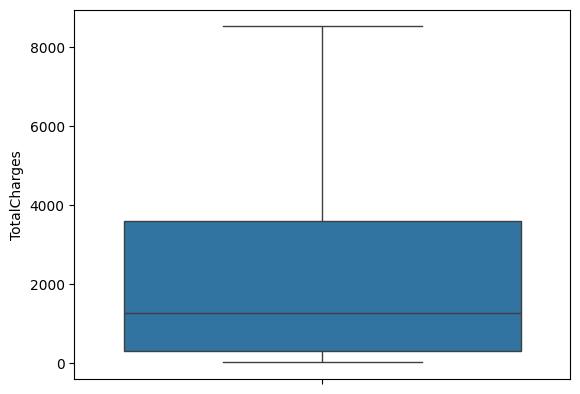

In [17]:
df_train['TotalCharges'] = df_train['TotalCharges'].clip(low_limit, up_limit)
sns.boxplot(data = df_train['TotalCharges'])

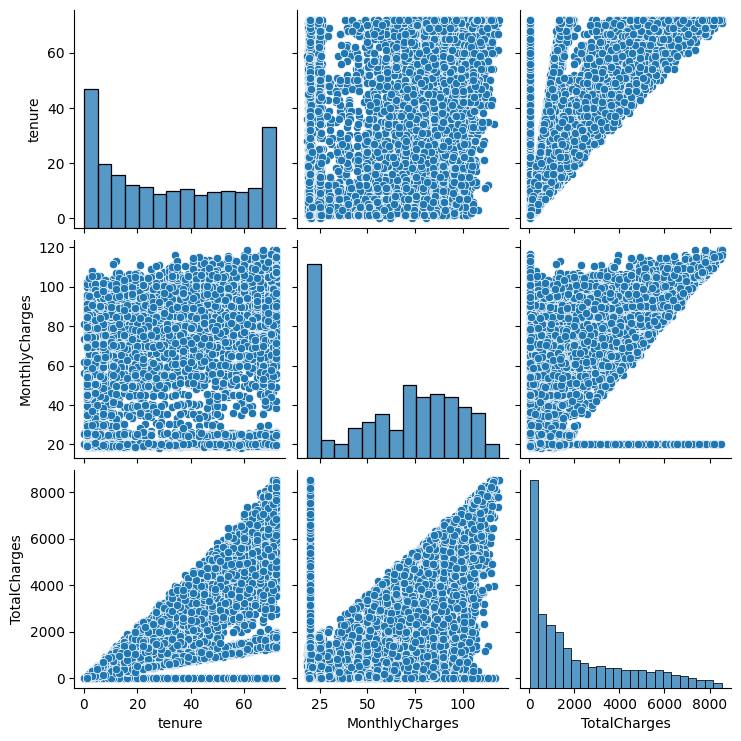

In [18]:
# visualization of the dataset
sns.pairplot(df_train)

In [19]:
# identifying unique values in the categorical columns
def unique_iden(df):
  for col in df.select_dtypes(include=["object","category"]).columns:
    print(f"{col}:{df[col].unique()}")

print("unique values in train dataset \n \n")
unique_iden(df_train)

print("\n \n unique values in test dataset \n \n ")
unique_iden(df_test)

unique values in train dataset 
 

gender:['Female' 'Male']
SeniorCitizen:[0, 1]
Categories (2, int64): [0, 1]
Partner:['No' 'Yes']
Dependents:['No' 'Yes']
PhoneService:['Yes' 'No']
MultipleLines:['No' 'No phone service' 'Yes']
InternetService:['No' 'DSL' 'Fiber optic']
OnlineSecurity:['No internet service' 'No' 'Yes']
OnlineBackup:['No internet service' 'No' 'Yes']
DeviceProtection:['No internet service' 'Yes' 'No']
TechSupport:['No internet service' 'Yes' 'No']
StreamingTV:['No internet service' 'No' 'Yes']
StreamingMovies:['No internet service' 'No' 'Yes']
Contract:['One year' 'Month-to-month' 'Two year']
PaperlessBilling:['No' 'Yes']
PaymentMethod:['Mailed check' 'Electronic check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']

 
 unique values in test dataset 
 
 
gender:['Male' 'Female']
SeniorCitizen:[0, 1]
Categories (2, int64): [0, 1]
Partner:['Yes' 'No']
Dependents:['Yes' 'No']
PhoneService:['Yes' 'No']
MultipleLines:['Yes' 'No phone service' 'No'

In [20]:
# combine the categorical values having the same meaning.
df_train.replace({
    "MultipleLines":{"No phone service":"No"},
    "OnlineSecurity":{"No internet service":"No"},
    "OnlineBackup":{"No internet service":"No"},
    "DeviceProtection":{"No internet service":"No"},
    "TechSupport":{"No internet service":"No"},
    "StreamingTV":{"No internet service":"No"},
    "StreamingMovies":{"No internet service":"No"},
    "InternetService": {"Fiber optic": 2, "DSL": 1, "No": 0},
    "PaymentMethod": {"Electronic check": 0, "Mailed check": 1, "Bank transfer (automatic)": 2, "Credit card (automatic)": 3},
}, inplace=True)


df_test.replace({
    "MultipleLines":{"No phone service":"No"},
    "OnlineSecurity":{"No internet service":"No"},
    "OnlineBackup":{"No internet service":"No"},
    "DeviceProtection":{"No internet service":"No"},
    "TechSupport":{"No internet service":"No"},
    "StreamingTV":{"No internet service":"No"},
    "StreamingMovies":{"No internet service":"No"},
    "InternetService": {"Fiber optic": 2, "DSL": 1, "No": 0},
    "PaymentMethod": {"Electronic check": 0, "Mailed check": 1, "Bank transfer (automatic)": 2, "Credit card (automatic)": 3},

}, inplace=True)

/tmp/ipython-input-4094374997.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train.replace({
/tmp/ipython-input-4094374997.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test.replace({


In [21]:
unique_iden(df_train)


gender:['Female' 'Male']
SeniorCitizen:[0, 1]
Categories (2, int64): [0, 1]
Partner:['No' 'Yes']
Dependents:['No' 'Yes']
PhoneService:['Yes' 'No']
MultipleLines:['No' 'Yes']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['No' 'Yes']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['One year' 'Month-to-month' 'Two year']
PaperlessBilling:['No' 'Yes']
Churn:['No' 'Yes']


In [22]:
unique_iden(df_test)

gender:['Male' 'Female']
SeniorCitizen:[0, 1]
Categories (2, int64): [0, 1]
Partner:['Yes' 'No']
Dependents:['Yes' 'No']
PhoneService:['Yes' 'No']
MultipleLines:['Yes' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['No' 'Yes']
DeviceProtection:['Yes' 'No']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
Churn:['No' 'Yes']


In [23]:
# scaling

min_max_scale = MinMaxScaler(feature_range=(0,1))

df_train['tenure'] = min_max_scale.fit_transform(df_train[['tenure']])
df_train['MonthlyCharges'] = min_max_scale.fit_transform(df_train[['MonthlyCharges']])
df_train['TotalCharges'] = min_max_scale.fit_transform(df_train[['TotalCharges']])

df_test['tenure'] = min_max_scale.fit_transform(df_test[['tenure']])
df_test['MonthlyCharges'] = min_max_scale.fit_transform(df_test[['MonthlyCharges']])
df_test['TotalCharges'] = min_max_scale.fit_transform(df_test[['TotalCharges']])


In [24]:
df_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,No,No,0.486111,Yes,No,0,No,No,No,No,No,No,One year,No,1,0.024876,0.080067,No
1,Female,0,No,No,0.388889,No,No,1,No,No,Yes,Yes,No,No,Month-to-month,Yes,1,0.174129,0.110721,No
2,Male,0,No,No,0.777778,Yes,Yes,2,No,Yes,No,No,Yes,Yes,Month-to-month,No,0,0.799502,0.653390,No
3,Male,0,Yes,No,0.541667,Yes,No,0,No,No,No,No,No,No,Two year,Yes,2,0.021891,0.090587,No
4,Female,0,Yes,Yes,0.597222,No,No,1,No,Yes,No,Yes,Yes,No,One year,Yes,2,0.328358,0.250533,No


# ENCODING

In [25]:
# Label Encoding for target(Churn)
label_enc = LabelEncoder()
df_train['Churn'] = label_enc.fit_transform(df_train['Churn'])
df_test['Churn'] = label_enc.fit_transform(df_test['Churn'])

# label encoding for other binary columns:

binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'gender','MultipleLines','DeviceProtection','OnlineBackup','OnlineSecurity','InternetService','TechSupport','StreamingTV','StreamingMovies','PaymentMethod']
for col in binary_cols:
    df_train[col] = label_enc.fit_transform(df_train[col])
    df_test[col] = label_enc.fit_transform(df_test[col])

In [26]:
mapping = {'Month-to-month': 0, 'One year': 1, 'Two year': 2}

df_train['Contract'] = df_train['Contract'].map(mapping)
df_test['Contract']  = df_test['Contract'].map(mapping)


In [27]:
df_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,0,0.486111,1,0,0,0,0,0,0,0,0,1,0,1,0.024876,0.080067,0
1,0,0,0,0,0.388889,0,0,1,0,0,1,1,0,0,0,1,1,0.174129,0.110721,0
2,1,0,0,0,0.777778,1,1,2,0,1,0,0,1,1,0,0,0,0.799502,0.653390,0
3,1,0,1,0,0.541667,1,0,0,0,0,0,0,0,0,2,1,2,0.021891,0.090587,0
4,0,0,1,1,0.597222,0,0,1,0,1,0,1,1,0,1,1,2,0.328358,0.250533,0


# Model Buliding

In [28]:
X_train = df_train.drop('Churn', axis=1)
y_train = df_train['Churn']

X_test = df_test.drop('Churn', axis=1)
y_test = df_test['Churn']

Logistic Regression

In [29]:
#building Logistic regression model
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, y_train) # training the model
y_pred = log_reg_model.predict(X_test) # predicting the test data
#evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test,y_pred, average='weighted')

print('Accuracy : ', accuracy)
print('Precision : ', precision)
print('Recall : ', recall)

Accuracy :  0.8168914123491838
Precision :  0.8090251620361844
Recall :  0.8168914123491838


In [30]:
# precission using Threshold
y_pred_threshold = log_reg_model.predict_proba(X_test)[:, 1]
# for class 1.
y_pred_threshold = (y_pred_threshold > 0.33).astype(int)

#evaluate the model
accuracy_thresh = accuracy_score(y_test, y_pred_threshold)
precision_thresh = precision_score(y_test, y_pred_threshold, average='weighted')
recall_thresh = recall_score(y_test,y_pred_threshold, average='weighted')

print('Threshold value used = 0.33')
print('Accuracy : ', accuracy_thresh)
print('Precision : ', precision_thresh)
print('Recall : ', recall_thresh)

Threshold value used = 0.33
Accuracy :  0.7622427253371186
Precision :  0.7914135128519715
Recall :  0.7622427253371186


KNN

In [31]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train) #training model
y_pred_knn = knn.predict(X_test) # prediction
# evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')

print('Accuracy : ', accuracy_knn)
print('Precision : ', precision_knn)
print('Recall : ', recall_knn)

Accuracy :  0.7501774308019872
Precision :  0.7471120009608071
Recall :  0.7501774308019872


Naive Bayes

In [32]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train) # training the model
y_pred_nb = nb_model.predict(X_test) # predicting the test data
#evaluate the model
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average='weighted')
recall_nb = recall_score(y_test, y_pred_nb, average='weighted')

print('Accuracy : ', accuracy_nb)
print('Precision : ', precision_nb)
print('Recall : ', recall_nb)



Accuracy :  0.758694109297374
Precision :  0.7907068745086305
Recall :  0.758694109297374


SVM CLASSIFIER

In [33]:
svm_model = SVC()
svm_model.fit(X_train, y_train) # training the model
y_pred_svm = svm_model.predict(X_test) # predicting the test data
#evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')

confusion_matrix_svm = confusion_matrix(y_test, y_pred_svm)

print('Accuracy : ', accuracy_svm)
print('Precision : ', precision_svm)
print('Recall : ', recall_svm)
print('Confusion Matrix :\n', confusion_matrix_svm)


Accuracy :  0.8034066713981547
Precision :  0.7920961789380184
Recall :  0.8034066713981547
Confusion Matrix :
 [[950  94]
 [183 182]]


Decision Tree

In [34]:
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train) # training the model
y_pred_decision = decision_tree_model.predict(X_test) # predicting the test data
#evaluate the model
accuracy_decision = accuracy_score(y_test, y_pred_decision)
precision_decision = precision_score(y_test, y_pred_decision, average='weighted')
recall_decision = recall_score(y_test, y_pred_decision, average='weighted')

print('Accuracy : ', accuracy_decision)
print('Precision : ', precision_decision)
print('Recall : ', recall_decision)

Accuracy :  0.7139815471965933
Precision :  0.7173134572518746
Recall :  0.7139815471965933


Random Forest

In [35]:
random_forest_model = RandomForestClassifier()
random_forest_model.fit(X_train, y_train) # training the model
y_pred_forest = random_forest_model.predict(X_test) # predicting the test data
#evaluate the model
accuracy_forest = accuracy_score(y_test, y_pred_forest)
precision_forest = precision_score(y_test, y_pred_forest, average='weighted')
recall_forest = recall_score(y_test, y_pred_forest, average='weighted')

print('Accuracy : ', accuracy_forest)
print('Precision : ', precision_forest)
print('Recall : ', recall_forest)


Accuracy :  0.7856635911994322
Precision :  0.7725154571960726
Recall :  0.7856635911994322


Model Comparison

In [36]:
model_comparision = {'Model': ['Logistic Regression Model','k-NN', 'Naive-Bayes', 'SVM Classifier', 'Decision Tree', 'Random Forest'],
                     'Accuracy': [accuracy, accuracy_knn, accuracy_nb, accuracy_svm, accuracy_decision, accuracy_forest],
                     'Precision':[precision, precision_knn, precision_nb, precision_svm, precision_decision, precision_forest],
                     'Recall':[recall, recall_knn, recall_nb, recall_svm, recall_decision, recall_forest]
                     }
df_comparison = pd.DataFrame(model_comparision)
df_comparison


,Model,Accuracy,Precision,Recall
0,Logistic Regression Model,0.816891,0.809025,0.816891
1,k-NN,0.750177,0.747112,0.750177
2,Naive-Bayes,0.758694,0.790707,0.758694
3,SVM Classifier,0.803407,0.792096,0.803407
4,Decision Tree,0.713982,0.717313,0.713982
5,Random Forest,0.785664,0.772515,0.785664


Based the comparison of these model it is found that the logistic regression model best fits the data ,since it has high accuracy and precision compared to other model.